In [1]:
from math import *
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from itertools import combinations

Constants

In [2]:
count_points = 20
alpha = pi / 4
G0 = 0

Function and points and space

In [13]:
y = lambda x: 2 * pow((x-2),2)+1
data = np.array([(i,y(i)) for i in np.linspace(1.,3.,count_points)])
data_colocation = np.array([(data[i]+data[i+1])/2 for i in range(len(data)-1)])
R = np.array([sqrt(pow(data[i+1,0]-data[i,0],2)+pow(data[i+1,1]-data[i,1],2)) for i in range(len(data)-1)])
v_inf = np.array((sin(alpha),cos(alpha)))

area = np.zeros((40,40))
mesh = []
for i in np.linspace(0.,4.,40):
    for j in np.linspace(0.,4.,40):
        mesh.append([i,j])
mesh = np.array(mesh).reshape(40,40,2)

Plot point and colocation

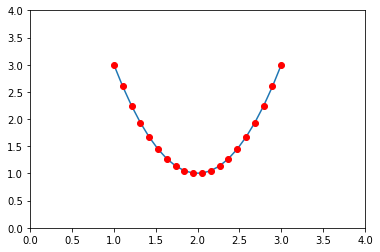

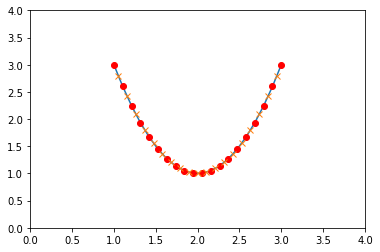

In [14]:
plt.ylim(0,4)
plt.xlim(0,4)
plt.plot(data[:,0],data[:,1])
plt.plot(data[:,0],data[:,1],'ro')
plt.show()

plt.ylim(0,4)
plt.xlim(0,4)
plt.plot(data[:,0],data[:,1])
plt.plot(data[:,0],data[:,1],'ro')
plt.plot(data_colocation[:,0],data_colocation[:,1],'x')
plt.show()

In [16]:
delta = np.min(np.linalg.norm(data[1:] - data[:-1], axis=1)) / 2

In [61]:
def normal2point(x0,y0,x1,y1):
    x = (x1-x0)/sqrt(pow(x1-x0,2)+pow(y1-y0,2))
    y = (y1-y0)/sqrt(pow(x1-x0,2)+pow(y1-y0,2))
    return (-y,x)

def Rj(x0,y0,x,y):
    return np.max(np.array([0.5*np.min(R),sqrt(pow(x-x0,2)+pow(y-y0,2))]))

def vj(x,y,x0,y0):
    res_x = (x-x0)/(2*pi*pow(Rj(x0,y0,x,y),2)) 
    res_y = (y-y0)/(2*pi*pow(Rj(x0,y0,x,y),2))
    return [res_x,res_y]

def createMatrix(collocation, points, v_inf, G0):
    norm = [np.array(normal2point(points[i,0],points[i,1],points[i+1,0],points[i+1,1])).reshape(2,1) for i in range(len(points)-1) ] 
    b = [np.dot(-1*v_inf,i) for i in norm]
    b.append(G0)
    b = np.array(b, dtype='float') 
    A = []
    for i in range(len(collocation)):
        A.append([np.dot(vj(collocation[i,0],collocation[i,1],p[0],p[1]),norm[i])[0] for p in points])
    A.append(np.ones(len(points)))
    A = np.array(A, dtype='float') 
    return np.linalg.solve(A,b)
    

In [78]:
Gamma = createMatrix(data_colocation, data, v_inf, G0)

In [79]:
def phi(x, y, t, points, G):
    return x*sin(alpha) + y*cos(alpha) + np.sum([G[j]/(2*pi)*atan((y-points[j,1])/(x-points[j,0])) for j in range(len(points))])

In [80]:
for i in range(area.shape[0]):
    for j in range(area.shape[1]):
        area[i,j] = phi(mesh[i,j][0], mesh[i,j][1], 1, data, Gamma)

In [81]:
area

array([[-5.96941205e+11, -6.09045426e+11, -6.21237576e+11, ...,
        -1.08495139e+12, -1.09859039e+12, -1.11220724e+12],
       [-5.89808041e+11, -6.02019481e+11, -6.14320918e+11, ...,
        -1.08280321e+12, -1.09658890e+12, -1.11035173e+12],
       [-5.82583144e+11, -5.94903528e+11, -6.07316046e+11, ...,
        -1.08067381e+12, -1.09461026e+12, -1.10852317e+12],
       ...,
       [-2.49153810e+11, -2.66448691e+11, -2.83977587e+11, ...,
        -1.01805702e+12, -1.04114641e+12, -1.06424450e+12],
       [-2.36441233e+11, -2.53909308e+11, -2.71618087e+11, ...,
        -1.01638964e+12, -1.03989777e+12, -1.06341890e+12],
       [-2.23486681e+11, -2.41129188e+11, -2.59019279e+11, ...,
        -1.01469741e+12, -1.03863608e+12, -1.06259239e+12]])

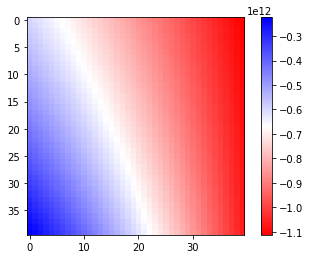

In [82]:
cmap = mcolors.LinearSegmentedColormap.from_list('colormap', ('red', 'white', 'blue'))
plt.imshow(area, cmap=cmap)
plt.colorbar()
#plt.imshow(test, cmap=cmap)

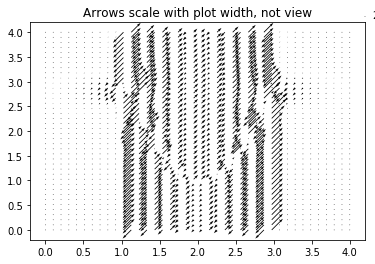

In [14]:
X = mesh.reshape(40*40,2)[:,0]
Y = mesh.reshape(40*40,2)[:,1]
U = area
V = area
fig1, ax1 = plt.subplots()
ax1.set_title('Arrows scale with plot width, not view')
Q = ax1.quiver(X, Y, U, V, units='width')
qk = ax1.quiverkey(Q, 0.9, 0.9, 2,'' r'$2 \frac{m}{s}$''', labelpos='E',
                   coordinates='figure')